# Import Necessary Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random


from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Step 1- Data Preparation

In [2]:
print("Preparing data...")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.0,), (1.0,))
])
print("Data prepartion done")
# Load MNIST dataset
print("Loading MNIST dataset...")
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
print("Loading dataset completed")

Preparing data...
Data prepartion done
Loading MNIST dataset...
Loading dataset completed


# Step 2- Model Architecture

In [3]:
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # flatten 28x28 images to 784 vector

            nn.Linear(784, 128), # hidden layer#1

            nn.ReLU(),
            nn.Linear(128, 64), # hidden layer#2
            nn.ReLU(),
            nn.Linear(64, 10), # output layer for 10 classes

    )
    
    def forward(self, x):
        return self.model(x)

model = FNN()

# Step 3- Model Training

Starting training...
Epoch [1/5], Loss: 0.1087
Epoch [2/5], Loss: 0.0180
Epoch [3/5], Loss: 0.1352
Epoch [4/5], Loss: 0.0926
Epoch [5/5], Loss: 0.0214


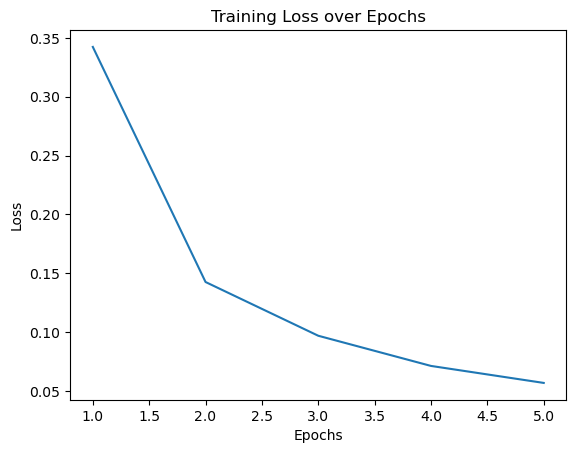

In [4]:
# Compile/Define Loss and Optimizer:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
print("Starting training...")
epochs = 5
losses = []

for epoch in range(epochs):
    epoch_loss = 0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss / len(train_loader))
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plt.plot(range(1, epochs + 1), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs') 
plt.show()


# Step 4- Model Evaluation

Accuracy of the model on the test images: 97.73 %


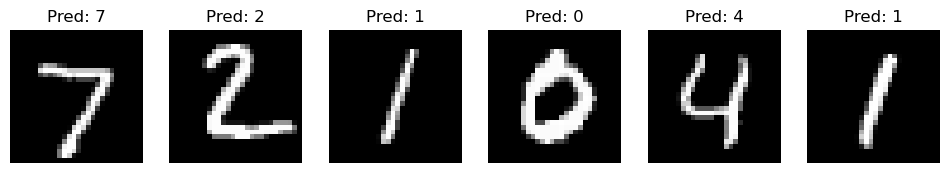

In [5]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the model on the test images: {100 * correct / total} %')

images, labels = next(iter(test_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)

# Plot first 6 images with predicted labels
fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Pred: {preds[i].item()}")
    axes[i].axis('off')
plt.show()

def show_predictions(title, model, images, labels):
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, 6, figsize=(12, 2))
    for i in range(6):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f"Pred: {preds[i].item()}")
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()




# Manual test: Predict one image


Running manual test on a single image...


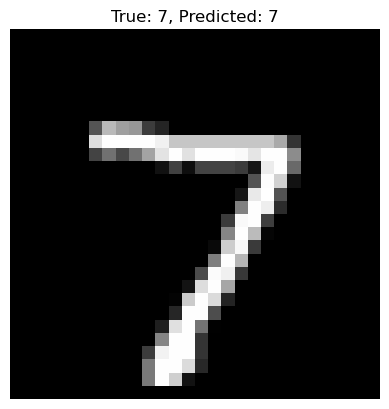

In [8]:

print("\nRunning manual test on a single image...")

# Get a batch and pick one image
images, labels = next(iter(test_loader))
image = images[0].unsqueeze(0)  # Add batch dimension
label = labels[0].item()

# Run prediction
output = model(image)
predicted = torch.argmax(output, 1).item()

# Show result
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"True: {label}, Predicted: {predicted}")
plt.axis('off')
plt.show()